Gefundene Personen: 7


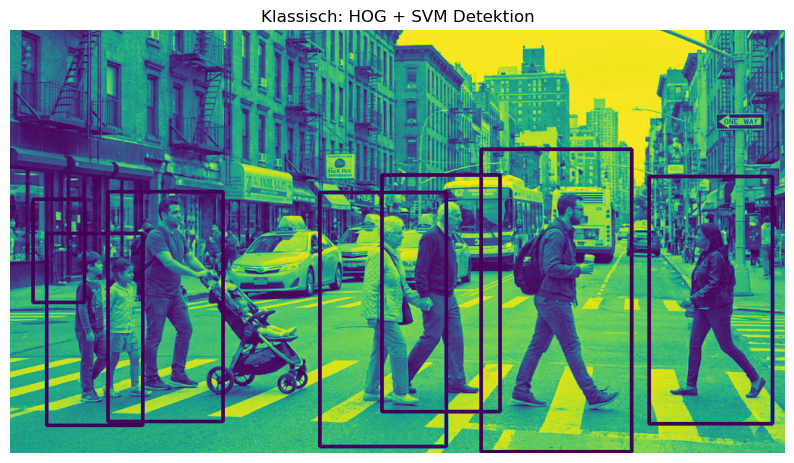

In [ ]:
# Der "alte" HOG-Detektor

import cv2
import matplotlib.pyplot as plt

# 1. Bild laden (Bibliothek)
img_gray = cv2.imread('Street.jpg', cv2.IMREAD_GRAYSCALE)
#img_gray = cv2.imread('library.jpg', cv2.IMREAD_GRAYSCALE)
#img_gray = cv2.imread('beatles.jpg', cv2.IMREAD_GRAYSCALE)
#img_gray = cv2.imread('Grasshopper.png', cv2.IMREAD_GRAYSCALE)

# 2. HOG Deskriptor & Detektor initialisieren (Vortrainiert von OpenCV)
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# 3. Sliding Window Detection (passiert intern in detectMultiScale)
# winStride: Wie weit springt das Fenster? (Größer = Schneller, aber ungenauer)
# scale: Wie stark wird das Bild skaliert für die Pyramide?
found_boxes, weights = hog.detectMultiScale(img_gray, winStride=(8,8), padding=(32,32), scale=1.05)

print(f"Gefundene Personen: {len(found_boxes)}")

# 4. Boxen zeichnen
img_result = img_gray.copy()
for (x, y, w, h) in found_boxes:
    cv2.rectangle(img_result, (x, y), (x+w, y+h), (0, 255, 0), 3)

plt.figure(figsize=(10, 6))
plt.imshow(img_result)
plt.title("Klassisch: HOG + SVM Detektion")
plt.axis("off")
plt.show()

# DISKUSSION:
# Seht ihr Fehler? (False Positives, übersehene Personen?)
# Wie lange hat es gedauert im Vergleich zu YOLO?

In [2]:
# Installation der Library (nur einmal nötig)
!pip install ultralytics

import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import urllib.request
import ssl

# SSL-Fix für den Download von Bildern (Standardprozedur an Unis)
ssl._create_default_https_context = ssl._create_unverified_context

# Hilfsfunktion zum Anzeigen in Jupyter (Matplotlib statt cv2.imshow)
def show_image(img, title="Bild"):
    # OpenCV nutzt BGR, Matplotlib nutzt RGB -> Konvertieren
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

print(f"Setup bereit. Torch Version: {torch.__version__}")
# Check ob GPU da ist (wäre gut für Video, für Bilder reicht CPU)
print(f"Gerät: {'cuda' if torch.cuda.is_available() else 'cpu'}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Setup bereit. Torch Version: 2.9.0+cu126
Gerät: cpu


In [3]:
# Das Modell laden ("Nano" Version)
# YOLO gibt es in verschiedenen Größen: Nano (n), Small (s), Medium (m), Large (l), XLarge (x).
# Wir nutzen YOLOv8n (Nano), da es extrem schnell ist und auf jedem Laptop läuft.

# Wir laden ein vortrainiertes Modell (COCO Dataset - 80 Klassen)
# Beim ersten Mal wird die Datei 'yolov8n.pt' automatisch heruntergeladen (ca. 6 MB)
model = YOLO('yolov8n.pt')

# Zeigen wir kurz die Architektur (die "Layers")
# Das verbindet zur Theorie: Conv2d, BatchNorm, SiLU (Activation)
print("Modell geladen. Info:")
model.info()


Modell geladen. Info:
YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

Bitte lade ein Bild hoch:


Saving beatles.jpg to beatles.jpg
Bild 'beatles.jpg' erfolgreich geladen!

0: 640x640 5 persons, 3 cars, 424.2ms
Speed: 9.4ms preprocess, 424.2ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)


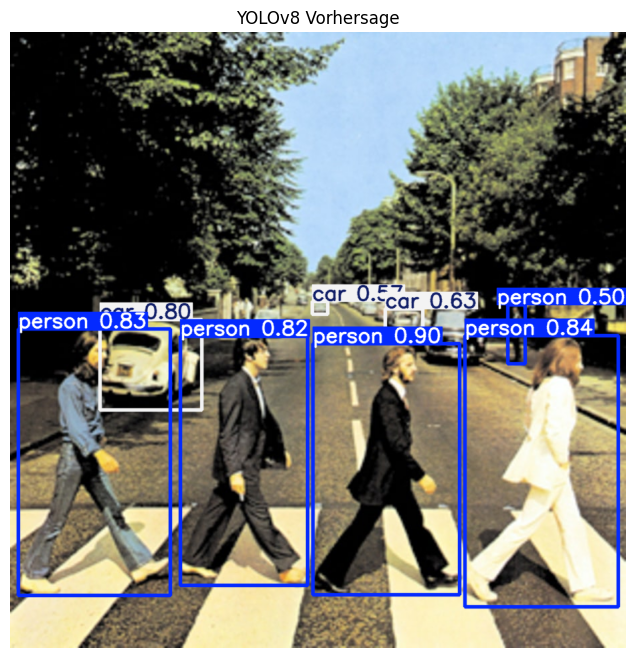

In [6]:
# Inferenz ("Hello World")

import torchvision.models as models
from PIL import Image
import requests
from io import BytesIO
from google.colab import files


# 3. Ein echtes Bild lokal hochladen
print("Bitte lade ein Bild hoch:")
uploaded = files.upload() # Dies öffnet einen Upload-Button im Output

# Den Dateinamen der hochgeladenen Datei holen
file_name = next(iter(uploaded))

# Das Bild öffnen
img = Image.open(BytesIO(uploaded[file_name])).convert('RGB')
print(f"Bild '{file_name}' erfolgreich geladen!")

# 2. Vorhersage machen (Inference)
# conf=0.5 -> Nur Boxen mit >50% Sicherheit anzeigen
results = model.predict(source=img, conf=0.5)

# 3. Ergebnisse visualisieren (Built-in Plotting)
# results[0].plot() zeichnet die Boxen direkt in das Bild
res_plotted = results[0].plot()

show_image(res_plotted, "YOLOv8 Vorhersage")

Bitte lade ein Bild hoch:


Saving Grasshopper.png to Grasshopper.png
Bild 'Grasshopper.png' erfolgreich geladen!

0: 640x640 2 persons, 255.7ms
Speed: 7.1ms preprocess, 255.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


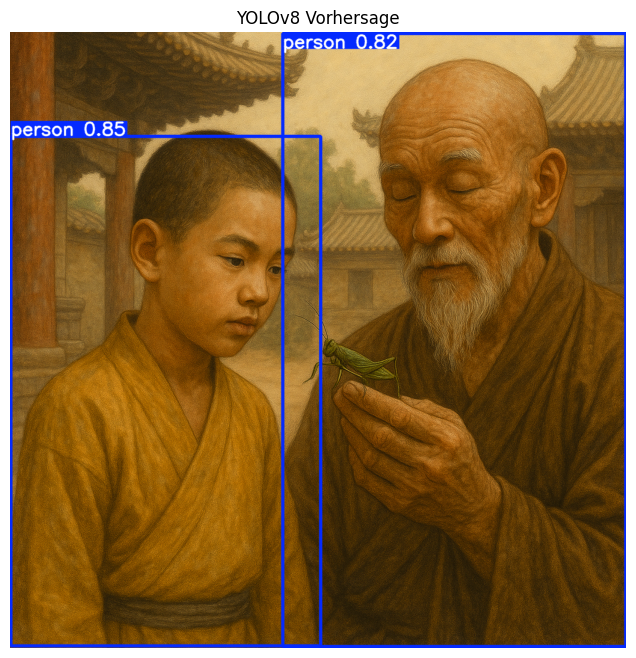

In [7]:
# 3. Ein echtes Bild lokal hochladen
print("Bitte lade ein Bild hoch:")
uploaded = files.upload() # Dies öffnet einen Upload-Button im Output

# Den Dateinamen der hochgeladenen Datei holen
file_name = next(iter(uploaded))

# Das Bild öffnen
img = Image.open(BytesIO(uploaded[file_name])).convert('RGB')
print(f"Bild '{file_name}' erfolgreich geladen!")

# 2. Vorhersage machen (Inference)
# conf=0.5 -> Nur Boxen mit >50% Sicherheit anzeigen
results = model.predict(source=img, conf=0.5)

# 3. Ergebnisse visualisieren (Built-in Plotting)
# results[0].plot() zeichnet die Boxen direkt in das Bild
res_plotted = results[0].plot()

show_image(res_plotted, "YOLOv8 Vorhersage")

Bitte lade ein Bild hoch:


Saving Street.jpg to Street.jpg
Bild 'Street.jpg' erfolgreich geladen!

0: 352x640 9 persons, 3 cars, 1 motorcycle, 1 bus, 1 backpack, 245.4ms
Speed: 6.1ms preprocess, 245.4ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)


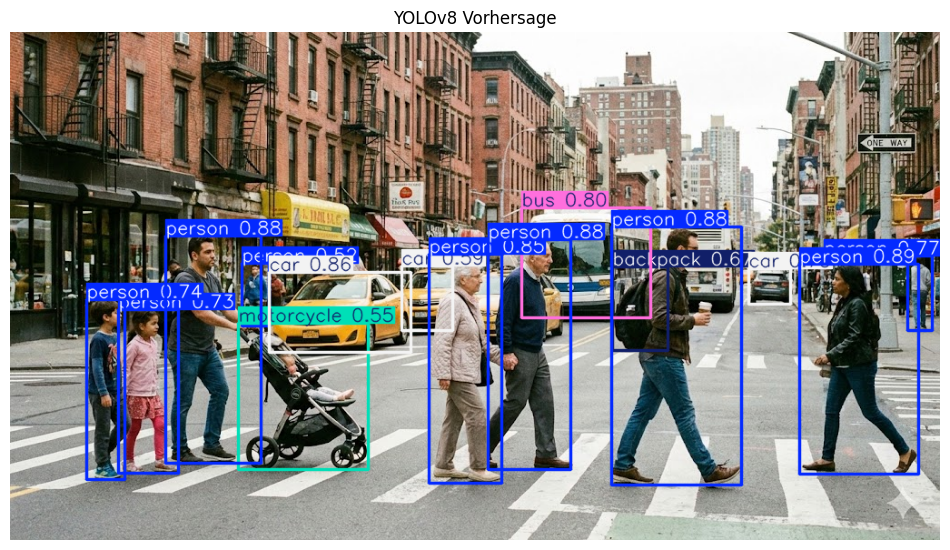

In [9]:
# 3. Ein echtes Bild lokal hochladen
print("Bitte lade ein Bild hoch:")
uploaded = files.upload() # Dies öffnet einen Upload-Button im Output

# Den Dateinamen der hochgeladenen Datei holen
file_name = next(iter(uploaded))

# Das Bild öffnen
img = Image.open(BytesIO(uploaded[file_name])).convert('RGB')
print(f"Bild '{file_name}' erfolgreich geladen!")

# 2. Vorhersage machen (Inference)
# conf=0.5 -> Nur Boxen mit >50% Sicherheit anzeigen
results = model.predict(source=img, conf=0.5)

# 3. Ergebnisse visualisieren (Built-in Plotting)
# results[0].plot() zeichnet die Boxen direkt in das Bild
res_plotted = results[0].plot()

show_image(res_plotted, "YOLOv8 Vorhersage")

In [10]:
# Deep Dive – Den Tensor verstehen
# Jetzt schauen wir "unter die Haube". Wie sieht der Output mathematisch aus?
# Das knüpft an die Theorie an: (x, y, w, h, conf, class).

# Wir nehmen das erste Ergebnis (wir haben ja nur ein Bild)
result = results[0]

# Zugriff auf die Boxen (Tensor auf der CPU)
boxes = result.boxes.cpu().numpy()

print(f"Anzahl gefundener Objekte: {len(boxes)}")
print("-" * 30)

# Wir iterieren durch jede gefundene Box
for i, box in enumerate(boxes):
    # 1. Koordinaten (x1, y1, x2, y2)
    # xyxy format ist oft einfacher zu nutzen als xywh (center, width, height)
    r = box.xyxy[0].astype(int)

    # 2. Confidence (Wie sicher ist das Netz?)
    conf = box.conf[0]

    # 3. Klasse (ID)
    cls_id = int(box.cls[0])

    # Namen der Klasse holen (z.B. 0='person', 5='bus')
    class_name = result.names[cls_id]

    print(f"Objekt {i+1}: {class_name} ({conf:.2f}%) bei Position {r}")

# LERNZIEL:
# Vergleichen Sie diese Koordinaten mit dem Bild oben.
# r[0], r[1] ist die Ecke links oben.
# r[2], r[3] ist die Ecke rechts unten.

Anzahl gefundener Objekte: 15
------------------------------
Objekt 1: person (0.89%) bei Position [ 869  255 1000  486]
Objekt 2: person (0.88%) bei Position [171 224 276 474]
Objekt 3: person (0.88%) bei Position [662 214 805 498]
Objekt 4: person (0.88%) bei Position [526 228 617 481]
Objekt 5: car (0.86%) bei Position [285 264 441 352]
Objekt 6: person (0.85%) bei Position [461 244 541 496]
Objekt 7: bus (0.80%) bei Position [563 193 705 314]
Objekt 8: person (0.77%) bei Position [ 988  246 1015  328]
Objekt 9: person (0.74%) bei Position [ 84 294 126 492]
Objekt 10: car (0.73%) bei Position [813 260 859 299]
Objekt 11: person (0.73%) bei Position [119 305 185 485]
Objekt 12: backpack (0.67%) bei Position [663 258 724 350]
Objekt 13: car (0.59%) bei Position [431 257 487 328]
Objekt 14: motorcycle (0.55%) bei Position [251 320 394 481]
Objekt 15: person (0.52%) bei Position [255 254 285 323]


Bitte lade ein Bild hoch:


Saving Street.jpg to Street (1).jpg
Bild 'Street (1).jpg' erfolgreich geladen!

0: 352x640 10 persons, 3 cars, 2 motorcycles, 2 buss, 2 backpacks, 140.9ms
Speed: 2.9ms preprocess, 140.9ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)
Anzahl erkannter Personen: 10


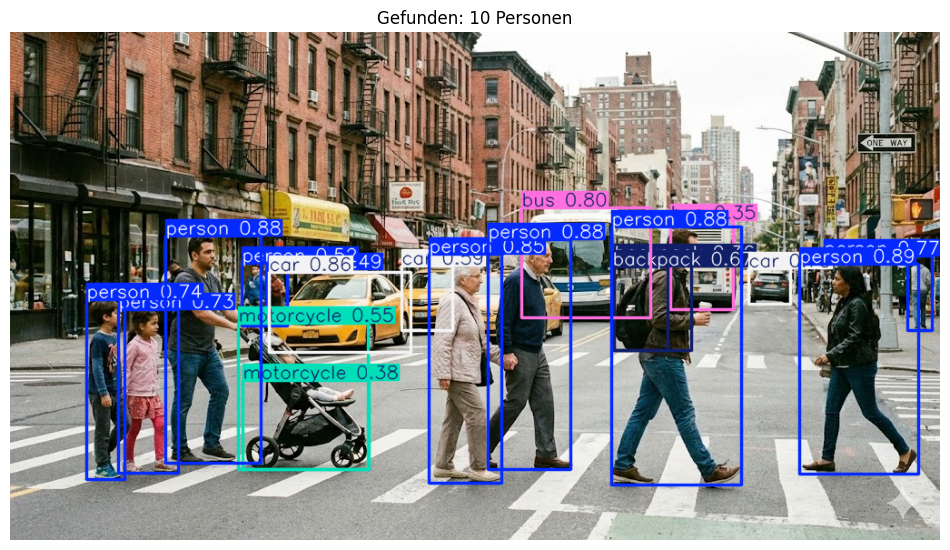

In [12]:
# Praxis-Übung "Smart Counter"
# Schreiben Sie ein Skript, das zählt, wie viele Personen auf dem Bild sind, aber alle anderen Objekte (Busse, Autos) ignoriert.

# ACHTUNG Spoiler

# 3. Ein echtes Bild lokal hochladen
print("Bitte lade ein Bild hoch:")
uploaded = files.upload() # Dies öffnet einen Upload-Button im Output

# Den Dateinamen der hochgeladenen Datei holen
file_name = next(iter(uploaded))

# Das Bild öffnen
img = Image.open(BytesIO(uploaded[file_name])).convert('RGB')
print(f"Bild '{file_name}' erfolgreich geladen!")

# Inferenz
results_count = model(img, conf=0.3) # Etwas toleranter sein (0.3)

# ---- IHR CODE HIER ----
person_count = 0
boxes = results_count[0].boxes

# Klasse 'person' hat meistens die ID 0 im COCO Dataset
# Wir filtern manuell
for box in boxes:
    cls_id = int(box.cls[0])
    if cls_id == 0: # 0 ist Person
        person_count += 1

print(f"Anzahl erkannter Personen: {person_count}")

# Visualisierung zur Kontrolle
show_image(results_count[0].plot(), f"Gefunden: {person_count} Personen")

# Adaptieren Sie nun das Script, um auch Autos zu zählen

In [ ]:
# Confidence: "Ändern Sie im Schritt 3 conf=0.5 auf conf=0.1. Was passiert mit dem Bild? Sehen Sie 'Geister' (False Positives)?"

# Klassen: "Was passiert, wenn wir YOLO auf ein Röntgenbild anwenden? Wird es Knochenbrüche erkennen?"

